# Visualizing **The Lord of the Rings** Ontology - version **1**

<img src="./images/LOTR-Viz.png" width="75%" align="center" alt="Visualizing **The Lord of the Rings** Ontology - version 1" />  

## setup and load data

In [1]:
import json
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
from collections import Counter, defaultdict
import re
import os
from IPython.display import SVG, Image, display
from IPython import get_ipython

In [2]:
from visualizing_lotr_v01 import *

Ensured directory exists: ./images/
lotr_data:  {}
loading data
Successfully loaded: middle_earth.json (1 entries)
Successfully loaded: region.json (6 entries)
Successfully loaded: race.json (9 entries)
Successfully loaded: kingdom.json (2 entries)
Successfully loaded: person.json (18 entries)
Successfully loaded: hobbit.json (5 entries)
Successfully loaded: elf.json (3 entries)
Successfully loaded: dwarf.json (1 entries)
Successfully loaded: man.json (6 entries)
Successfully loaded: wizard.json (2 entries)
Successfully loaded: artifact.json (8 entries)
Successfully loaded: weapon.json (3 entries)
Successfully loaded: ring.json (1 entries)
Successfully loaded: fellowship.json (1 entries)
Successfully loaded: location.json (15 entries)
Successfully loaded: journey.json (3 entries)
Successfully loaded: battle.json (3 entries)
Successfully loaded: alliance.json (1 entries)
Successfully loaded: beast.json (2 entries)
Successfully loaded: army.json (5 entries)
Successfully loaded: council.j

### is there an optimal way to display interactive plotly graphs in GitHub?

Turns out, no.  
This was just helpful in creating the images... 


In [3]:
# check if running in jupyter/colab or just rendering in GitHub

shell = get_ipython().__class__.__name__
show_interactive_fig = False
use_SVG = True
print(shell)
if (shell == 'ZMQInteractiveShell') or (shell == 'google.colab._shell'):
    show_interactive_fig = True
else:
    show_interactive_fig = False

print("interative visualizations: ",show_interactive_fig)

ZMQInteractiveShell
interative visualizations:  True


In [4]:
# test image display
show_interactive_fig = False

In [5]:
def show_fig_or_image(fig):
    image_filename = (fig.layout.title.text).replace(' ', '_')
    print(image_filename)
    if show_interactive_fig:
        fig.show(config={'toImageButtonOptions': {'format': 'svg', 'filename': image_filename}})
    else:
        image_filename_full = './images/'+image_filename+'.svg'
        if use_SVG:
            image = SVG(filename=image_filename_full)
        else:
            image = Image(filename=image_filename_full)
        display(image)

## Analysis 1: Character Demographics & Distribution

*  To understand the composition of the main characters involved in the trilogy's events based on Race and Alignment.
    * **Characters by Race**: Shows the percentage distribution of key characters across different races (Hobbit, Elf, Man, Dwarf, Wizard/Maiar), giving a quick overview of the racial makeup of the central cast.
    * **Characters by Race & Alignment**: Displays bars for each Race, segmented by character Alignment (Good, Evil, Neutral/Flawed). This helps visualize the predominant alignment within each race among the key characters.



Generating Viz 1: Character Distribution by Race
Distribution_of_Key_Characters_by_Race


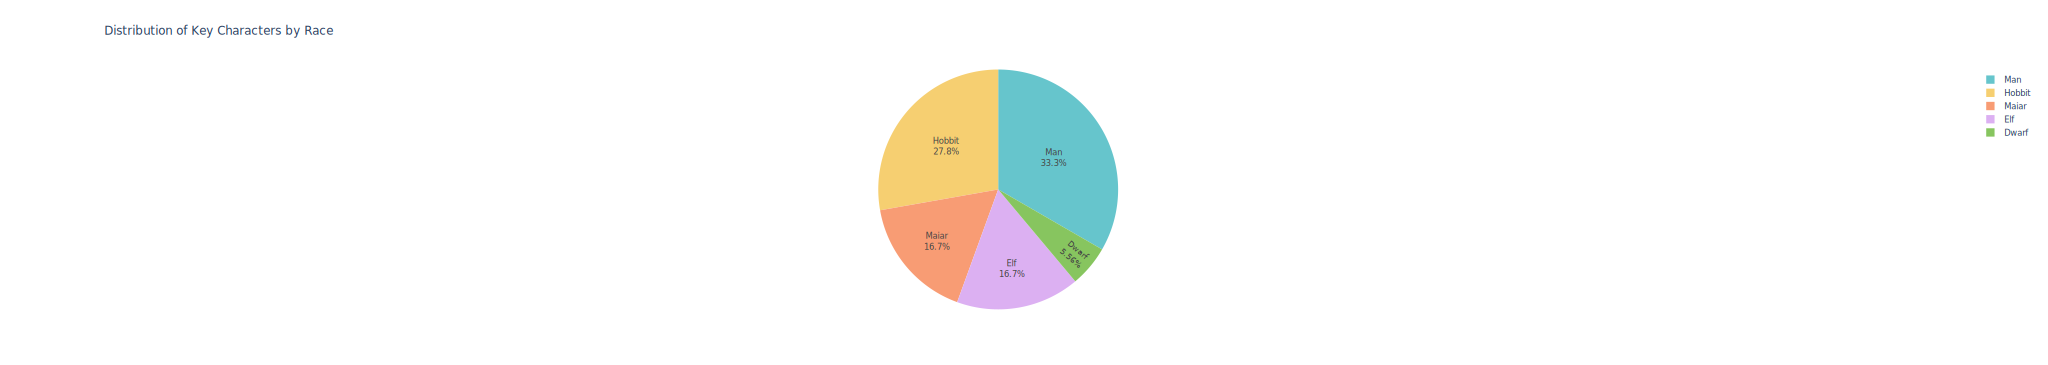

In [6]:
# v1 = viz1()
show_fig_or_image(viz1())


Generating Viz 2: Character Alignment by Race
Character_Alignment_Distribution_within_Each_Race


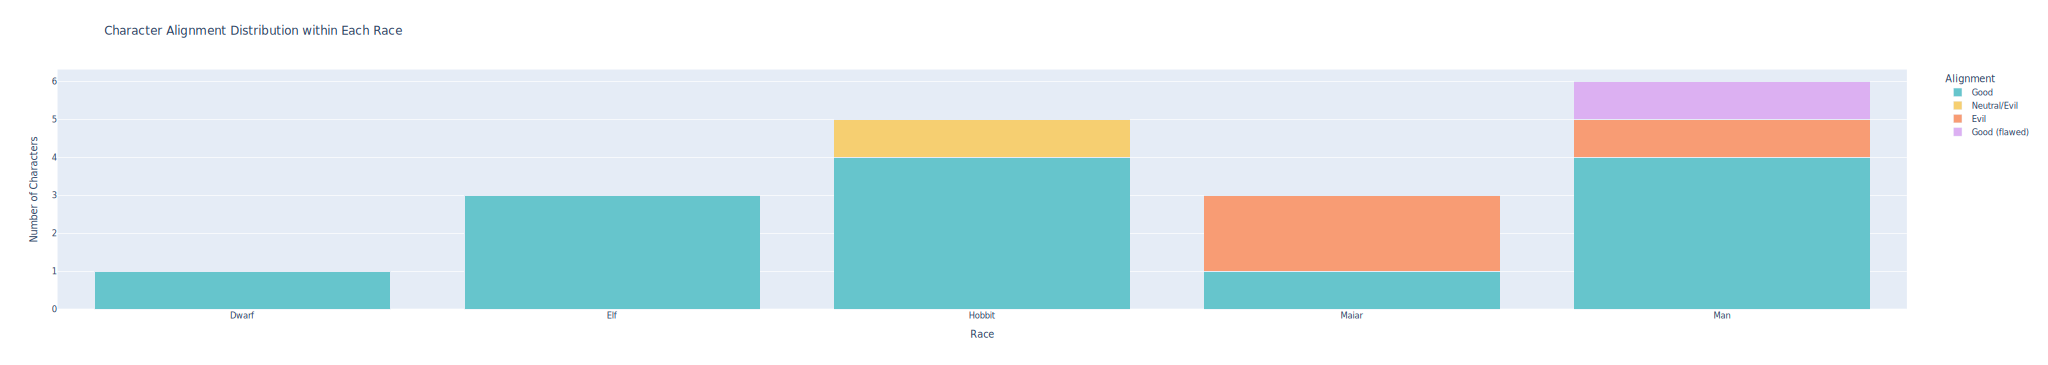

In [7]:
show_fig_or_image(viz2())

## Analysis 2: Key Item Distribution & Influence

*  To map the ownership/possession of significant Artifacts, Weapons, and Rings during the trilogy and assess their relative power.
    * **Significant Item Count per Character:** Shows how many major artifacts (as defined in the data) are directly associated with (possessed by) key characters, indicating who handles the most items of power or significance.
    * **Item Power Levels:** Compares the estimated `powerLevel` of major named Artifacts and Weapons (excluding the One Ring for scale), highlighting the most potent items in the narrative.



Generating Viz 3: Significant Item Count per Character
Number_of_Significant_Artifacts_Possessed_by_Key_Characters


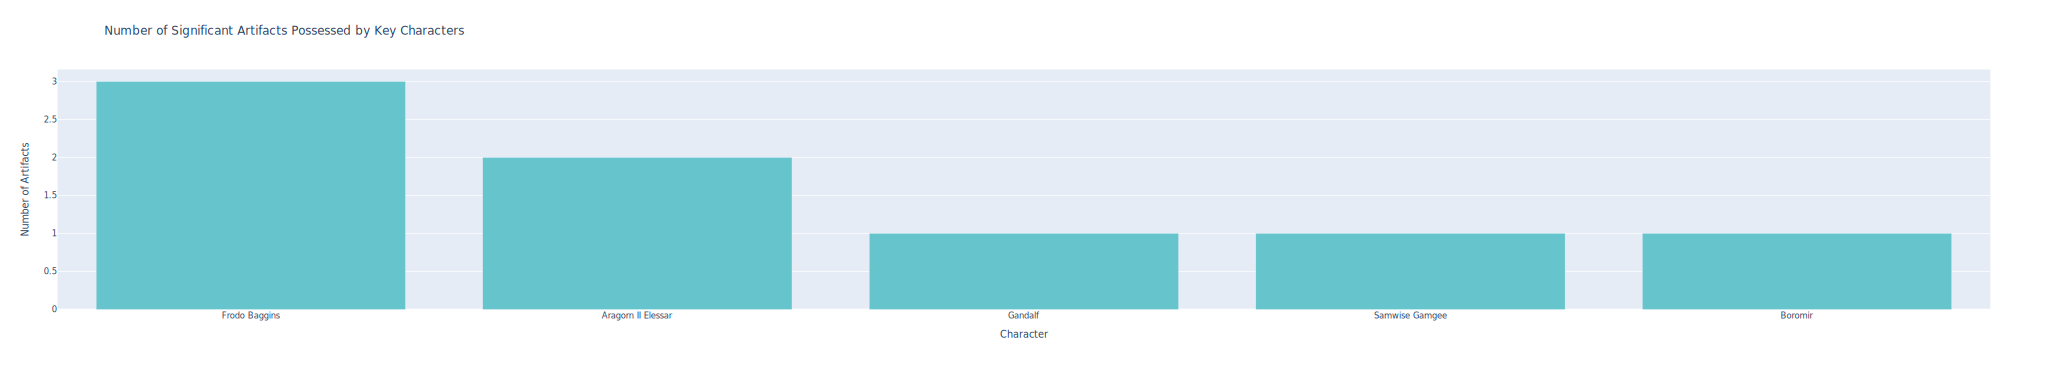

In [8]:
show_fig_or_image(viz3())


Generating Viz 4: Power Levels of Major Artifacts/Weapons
Power_Levels_of_Major_Artifacts_(Top_10_excluding_One_Ring)


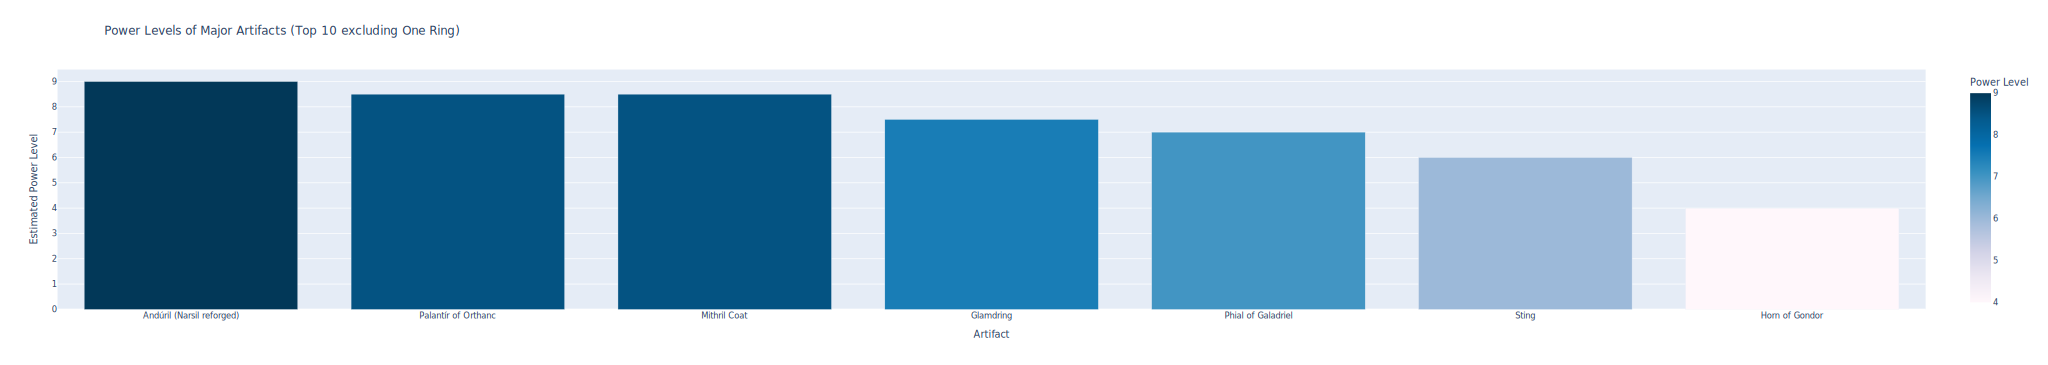

In [9]:
show_fig_or_image(viz4())

## Analysis 3: Fellowship Journey Mapping and Journey Risk Profile

*  To trace the path of the Fellowship, illustrating the sequence of key locations visited and to analyze and compare the risks associated with the different major journeys undertaken by key characters.
    * **Fellowship Journey Path (Sequence vs. Risk Factor):** Plots the sequence of key locations visited by the Fellowship against the estimated `riskFactor` of each location, showing the progression of danger along the path.
	* **Journey Risk Distribution:** Shows the distribution (median, quartiles, spread) of `riskFactor` values for locations associated with each major journey (Fellowship, Frodo/Sam, Aragorn/Legolas/Gimli), allowing comparison of the typical danger levels faced.
    * **Average Journey Risk:** Compares the simple average `riskFactor` across all locations associated with each major journey, providing a single metric for overall journey danger.



Generating Viz 5: Fellowship Journey Path (Sequence vs. Risk Factor)
Fellowship_Journey_-_Location_Sequence_vs._Risk_Factor


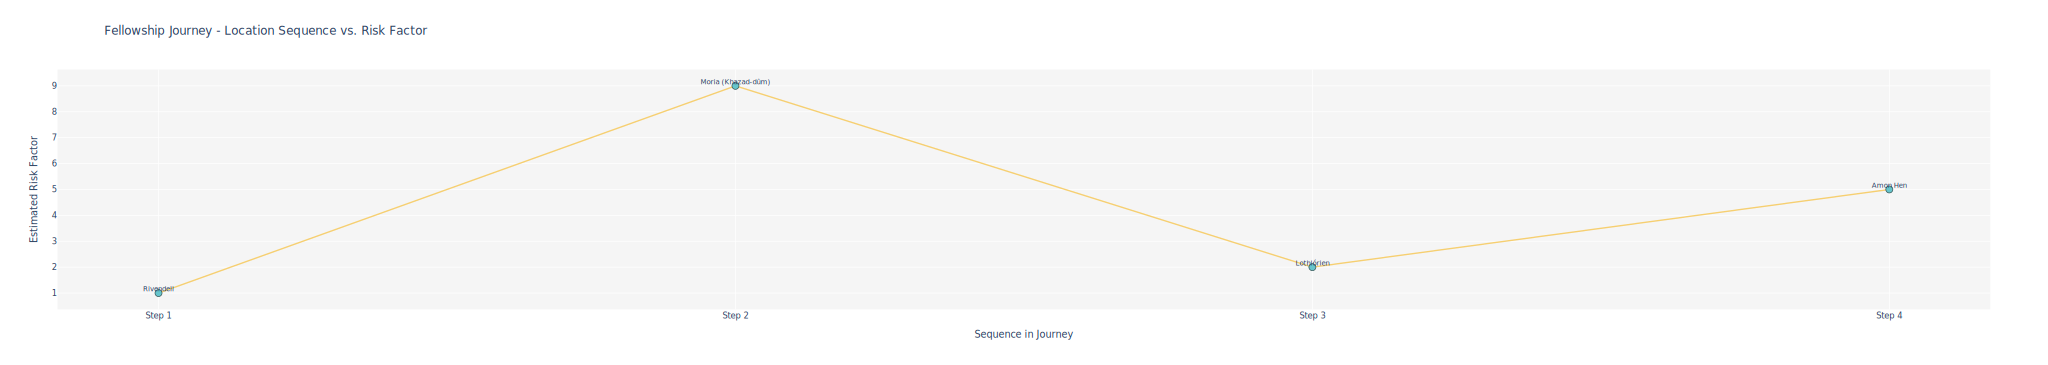

In [10]:
show_fig_or_image(viz5())


Generating Viz 5_1: Journey Risk Profile (Same as Viz 5)
Journey_Risk_Profiles


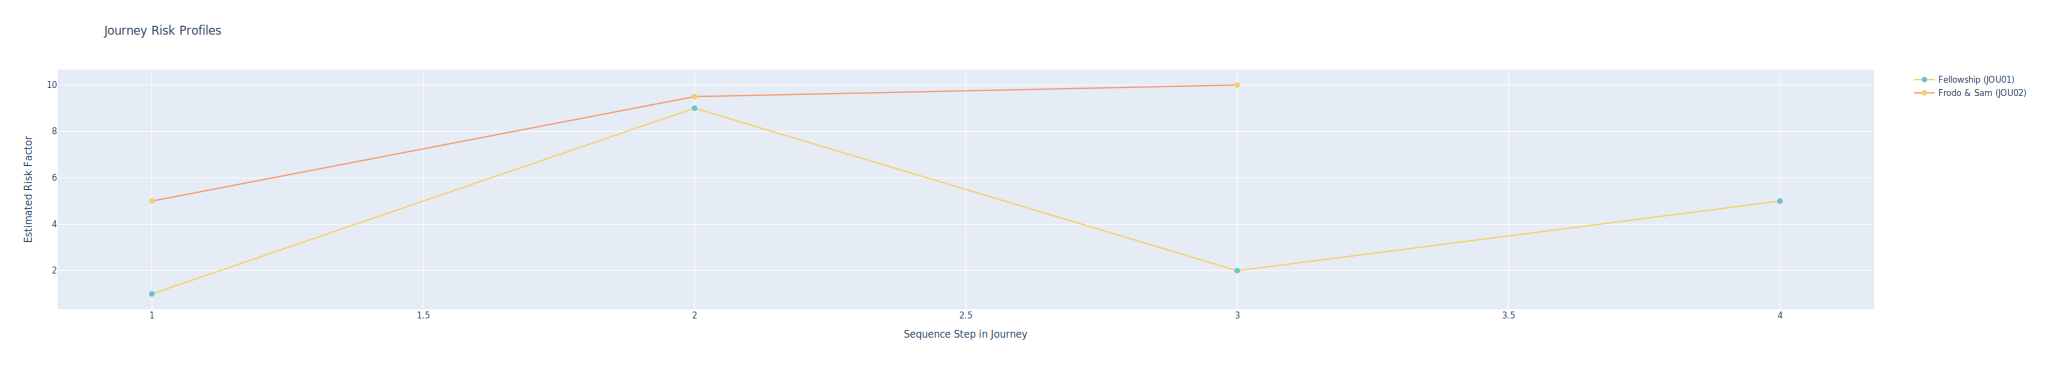

In [11]:
show_fig_or_image(viz6())


Generating Viz 5_2: Average Risk Factor per Major Journey
Average_Location_Risk_Factor_per_Major_Journey


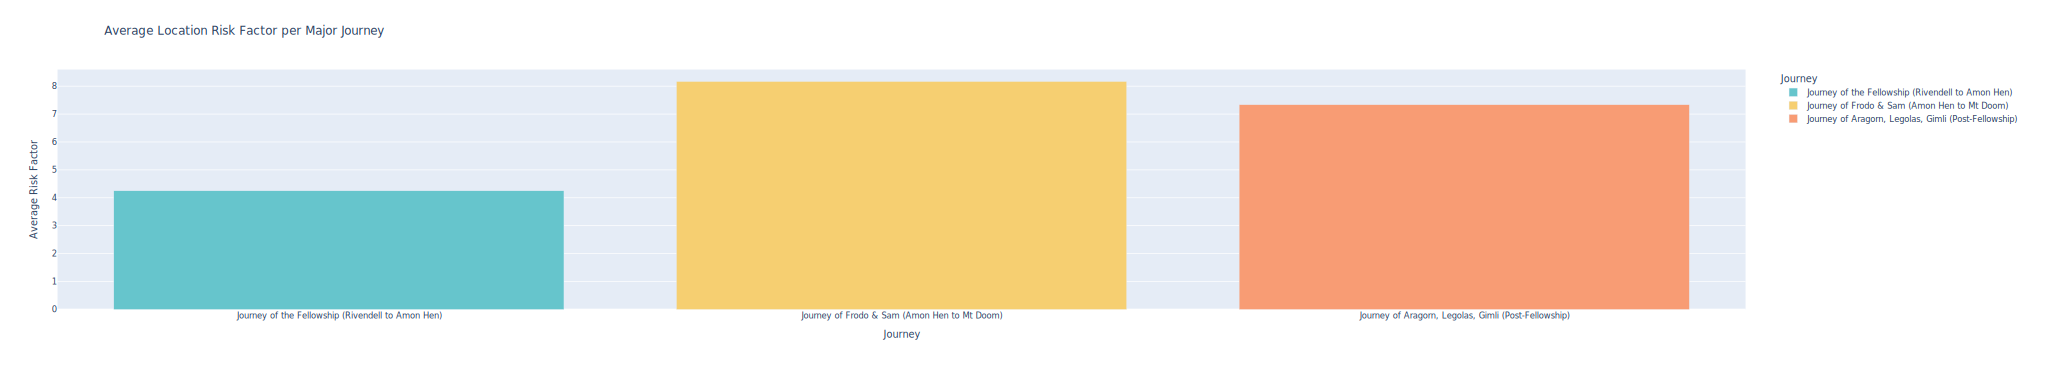

In [12]:
show_fig_or_image(viz7())

## Analysis 4: Major Battle Overview

*  To summarize the key battles of the War of the Ring, focusing on location, outcome, scale (casualties), duration, and participants.
    * **Battle Casualties**: Compares the estimated number of casualties across the major battles, indicating the scale and cost of each conflict.
    * **Armies in Pelennor Fields**: Illustrates the flow of specific armies participating in the Battle of the Pelennor Fields, showing which forces converged in this pivotal engagement. Node size can reflect army size.
    * **Battle Summary**: Provides a quick reference table listing major battles with their location, outcome, and estimated casualties.
		* **Battle Outcomes**: Shows the proportion of different outcomes (e.g., 'Victory for Good', 'Defeat') across the recorded battles, summarizing the overall success rate in major clashes.
		* **Battle Durations**: Compares the estimated duration (in hours) of the major battles, highlighting prolonged engagements versus shorter clashes.
		* **Number of Armies Involved**: Shows how many distinct named armies participated in each major battle, indicating the complexity and scale of forces involved.


Generating Viz 6: Estimated Casualties in Major Battles
Estimated_Casualties_in_Major_Battles


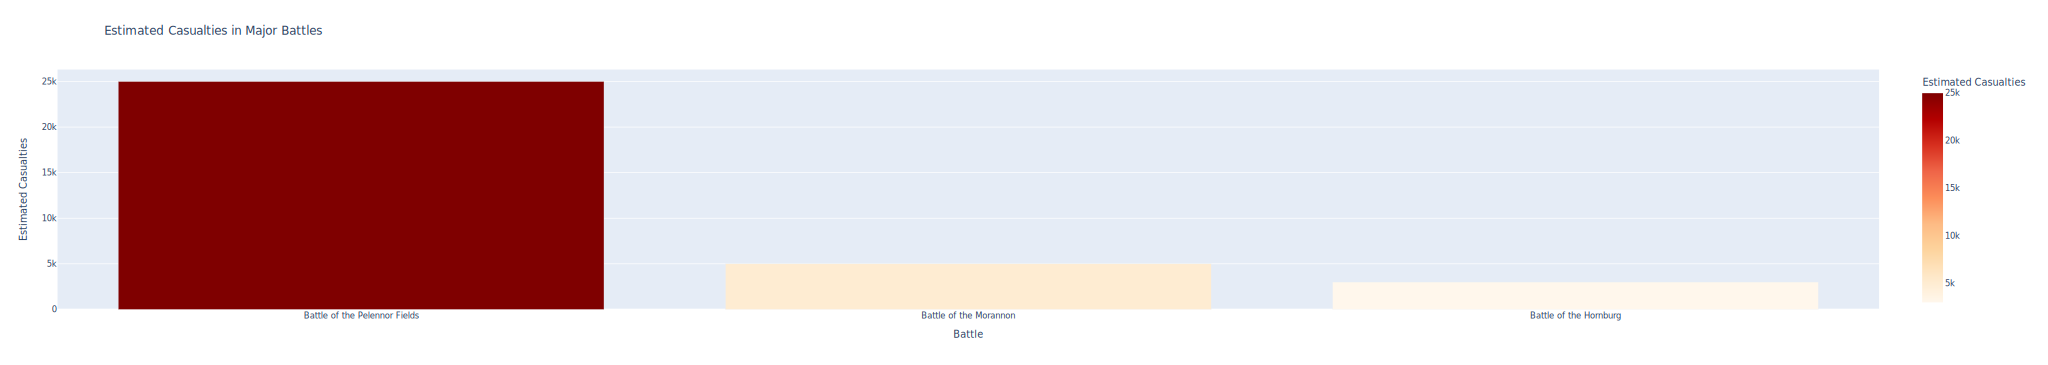

In [13]:
show_fig_or_image(viz8())


Generating Viz 7: Army Participation in Pelennor Fields
Armies_Participating_in_Battle_of_the_Pelennor_Fields


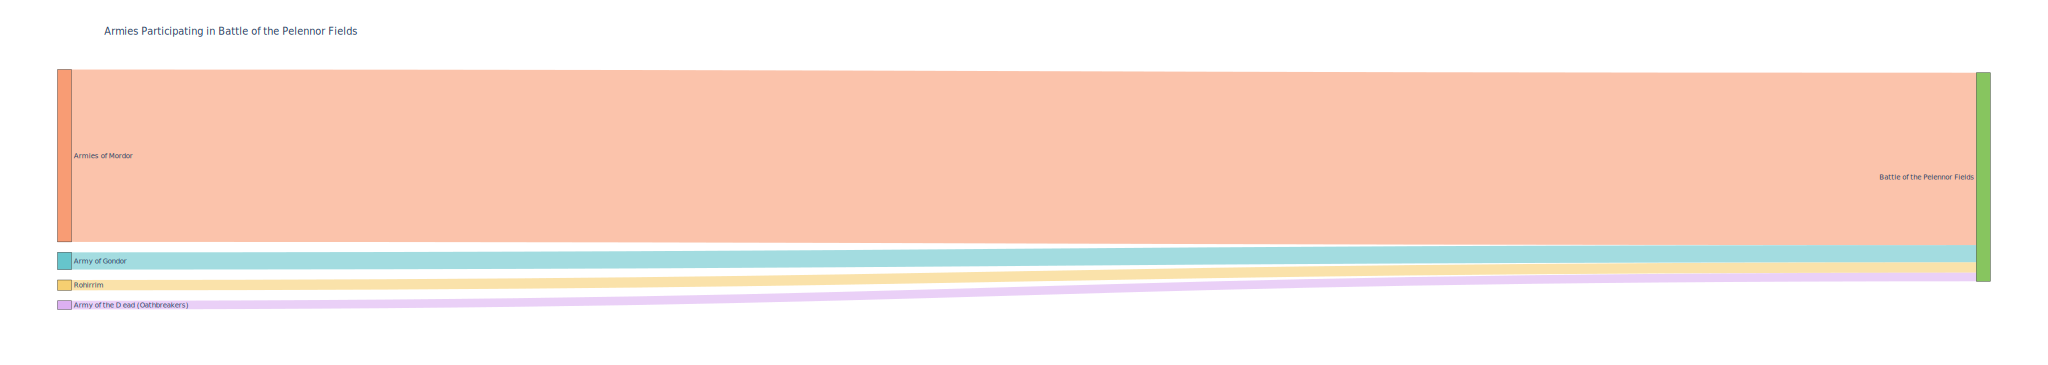

In [14]:
show_fig_or_image(viz9())


Generating Viz 8: Summary Table of Major Battles (Dates Removed)
Summary_Table_of_Major_Battles_(Location,_Outcome,_Casualties)


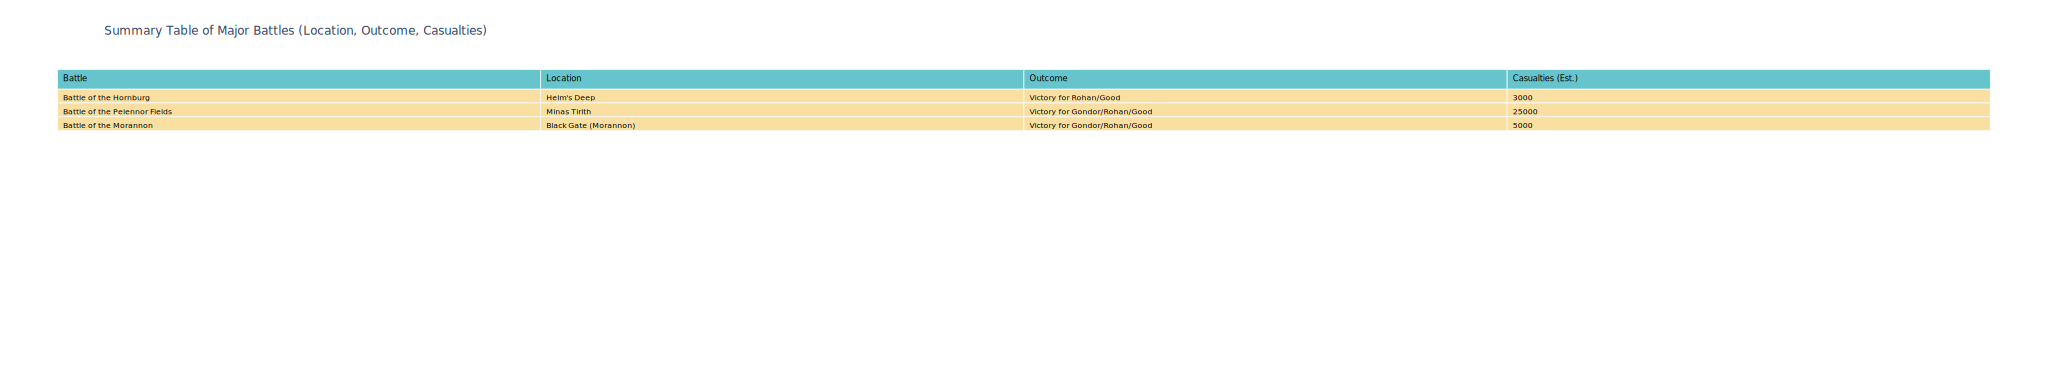

In [15]:
show_fig_or_image(viz10())


Generating Battle Viz 8_1: Pie Chart of Battle Outcomes
Distribution_of_Outcomes_for_Major_Battles


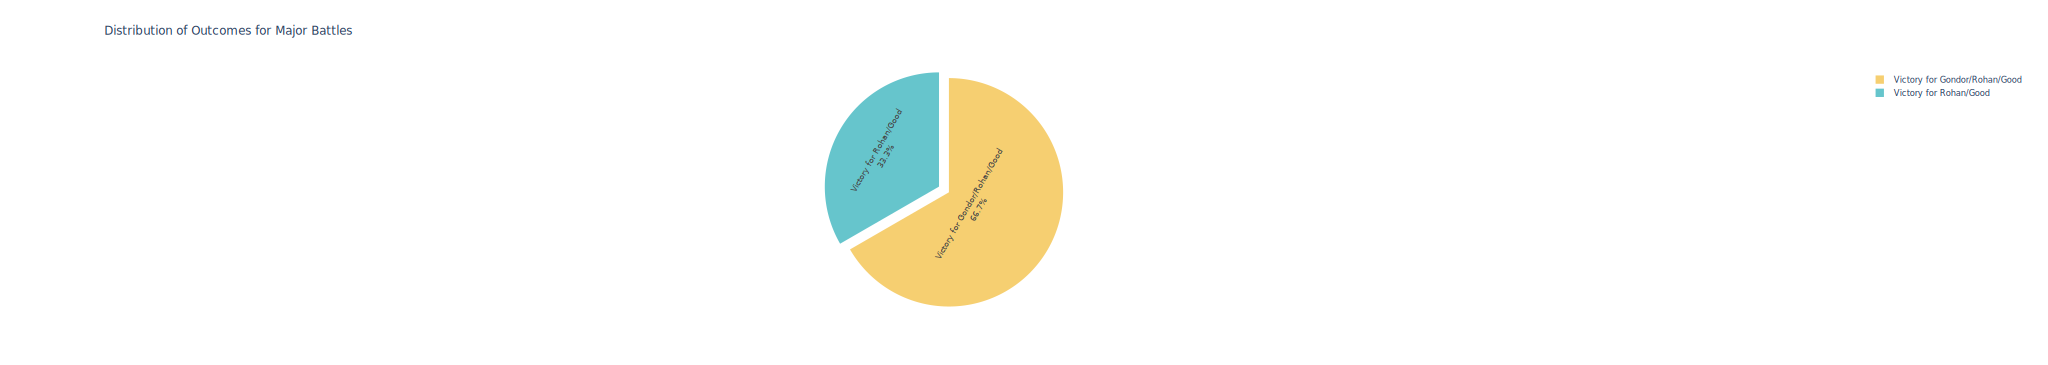

In [16]:
show_fig_or_image(viz11())


Generating Battle Viz 8_2: Bar Chart of Battle Durations
Estimated_Duration_of_Major_Battles


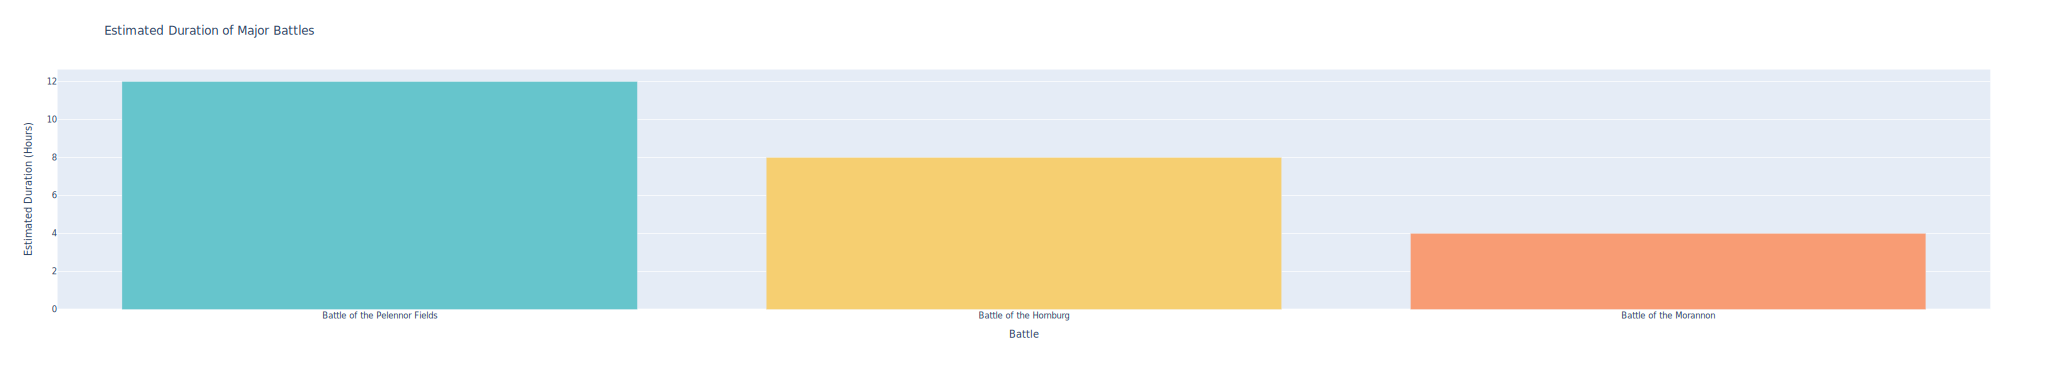

In [17]:
show_fig_or_image(viz12())


Generating  Battle Viz 8_3: Number of Armies Involved per Battle
Number_of_Distinct_Armies_Involved_in_Major_Battles


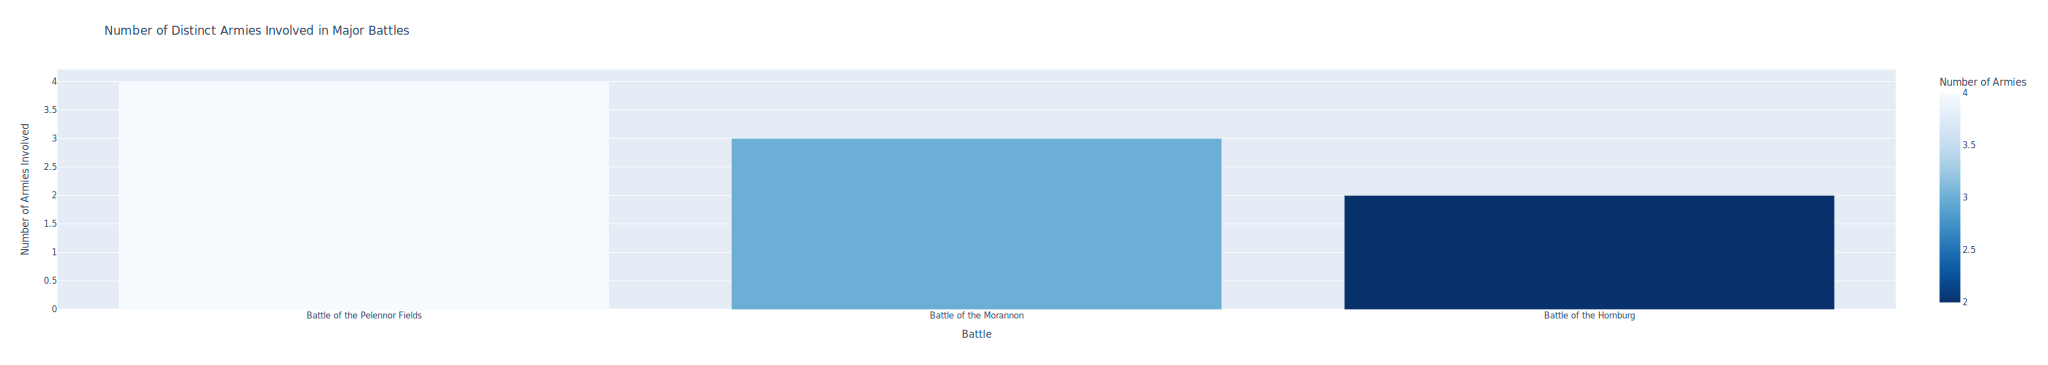

In [18]:
show_fig_or_image(viz13())

## Analysis 5: Location Significance: Events & Characteristics

*  To identify key locations for major events and explore correlations between location characteristics (like risk or magical aura) and the events occurring there.
    * **Location Risk vs. Events:** Plots locations based on their estimated `riskFactor` against the number of major events (battles/councils) hosted there, potentially revealing if higher-risk locations see more action.
    * **Events per Location:** Ranks key locations by the number of major events (battles/councils) associated with them, highlighting the most pivotal places in the narrative.
    * **Regions & Locations by Population:** Visualizes the hierarchy of Regions and Locations within them. Box sizes can represent estimated regional population, showing the relative scale of different parts of Middle-earth.


Generating Viz 9: Location Risk Factor vs. Number of Major Events
Location_Risk_Factor_vs._Number_of_Major_Events_(Battles_or_Councils)


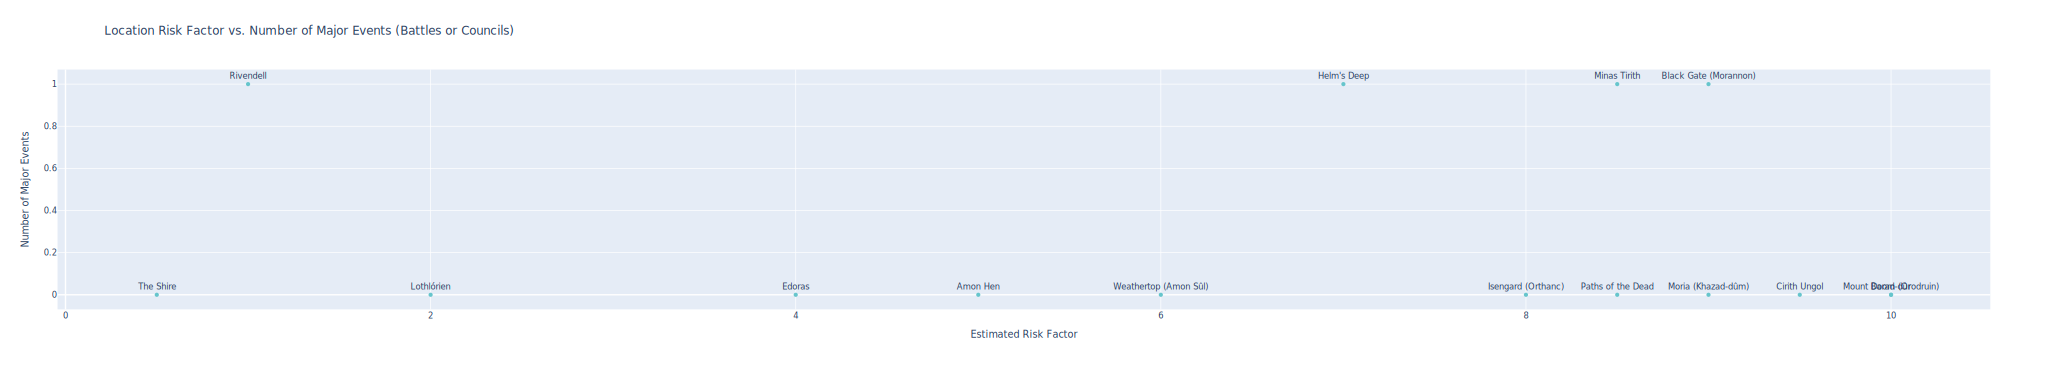

In [19]:
show_fig_or_image(viz14())


Generating Viz 10: Number of Major Events per Location
Number_of_Major_Events_(Battles_or_Councils)_per_Location


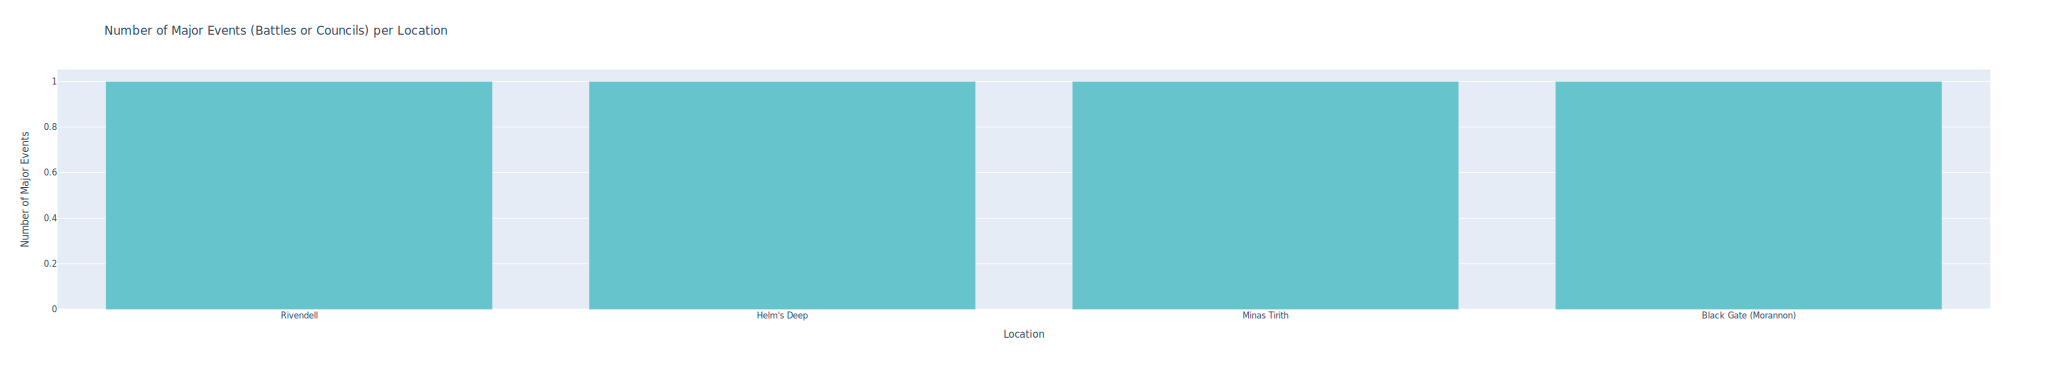

In [20]:
show_fig_or_image(viz15())


Generating Viz 11: Treemap of Regions and Locations by Population
Treemap_of_Locations_within_Regions


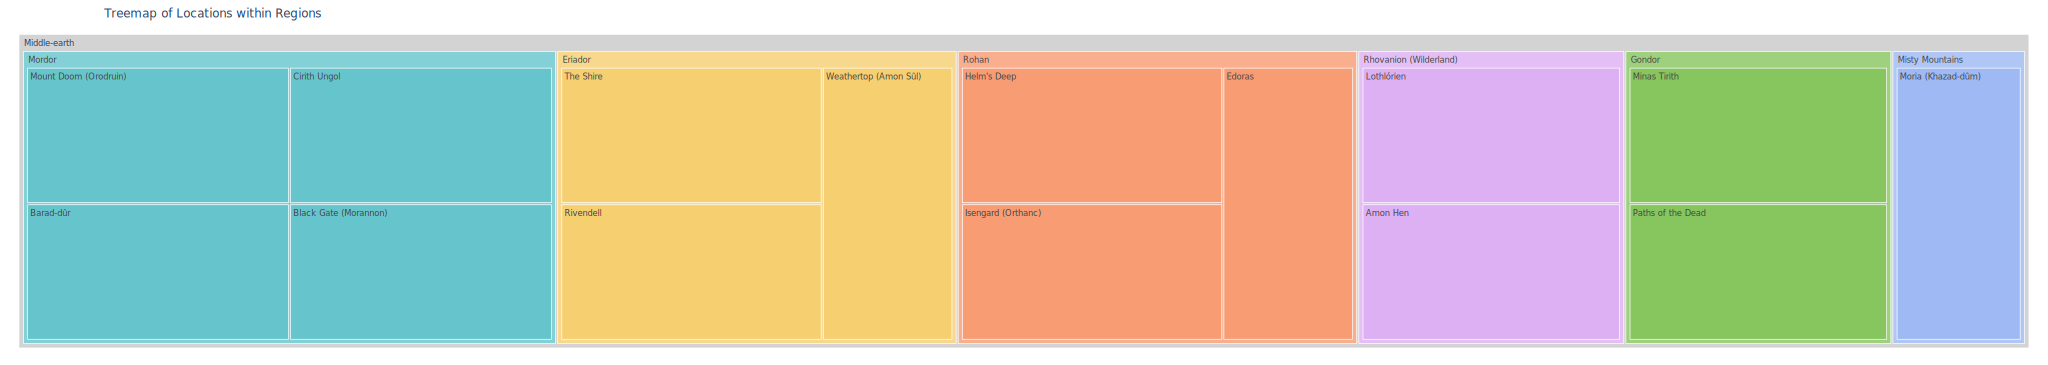

In [21]:
show_fig_or_image(viz16())

## Analysis 6: Character Interaction Network

*  To visualize the relationships and interactions between key characters based on co-participation in groups and major events.
    * **Character Interactions:** Displays characters as nodes and links them based on shared membership in the Fellowship or co-participation as commanders in major battles. This reveals clusters of characters who interacted frequently or shared significant experiences.


Generating Viz 12: Character Interaction Network (Comprehensive Edges)
Looking up node IDs...
Defining edges based on interactions...
Building graph and calculating layout...
Graph created with 20 nodes and 76 edges.
Creating plot traces...
Rendering figure...
Comprehensive_Character_Interaction_Network


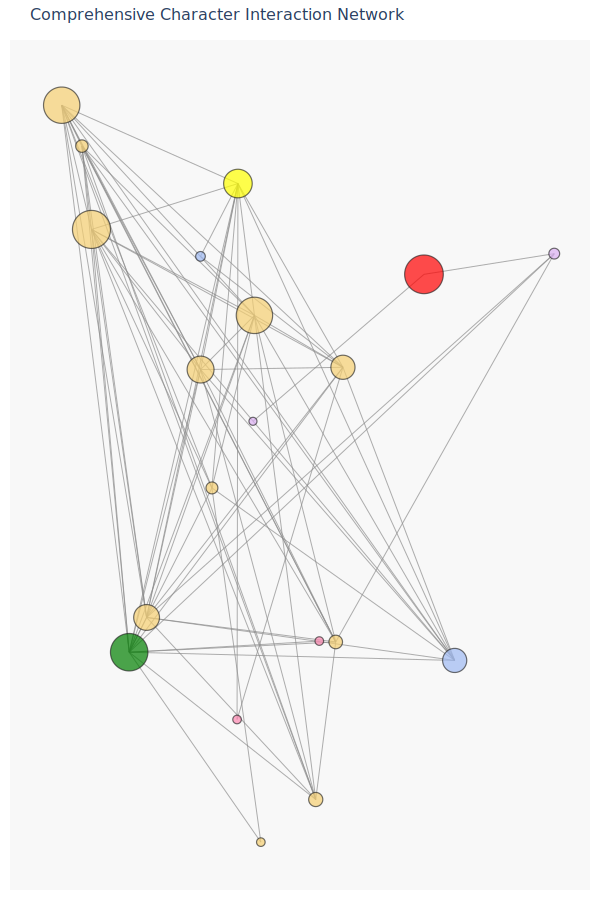

In [22]:
show_fig_or_image(viz17())

## Analysis 7: Alignment in Conflict

*  To show the balance of forces based on character/army Alignment ('Good' vs. 'Evil') in the major battles.
    * **Alignment Strength (Army Units) in Battles:** For major battles, this chart shows the total estimated army units involved, stacked by the alignment associated with the commanding characters, illustrating the relative strength of 'Good' vs. 'Evil' forces.



Generating Viz 13: Alignment Balance in Major Battles
Alignment_Strength_(Army_Units)_in_Major_Battles


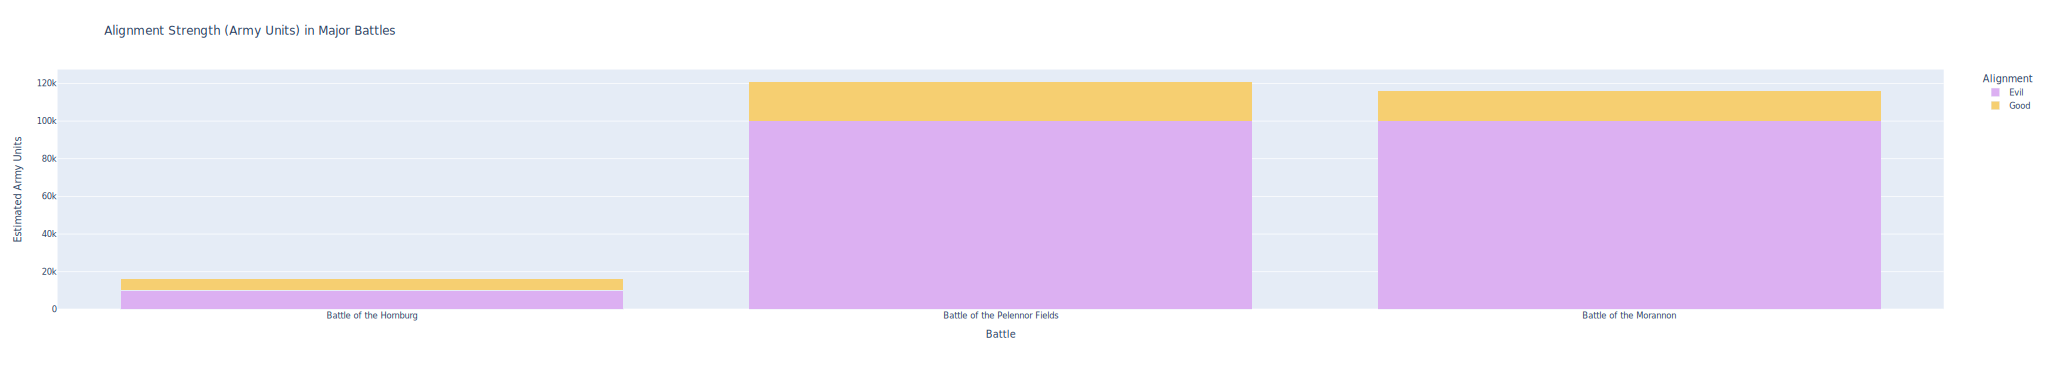

In [23]:
# viz24 because I made a typo while moving plotly code to the .py file
show_fig_or_image(viz24())

## Analysis 8: The One Ring's Journey & Influence

*  To track the One Ring's path through different bearers and its connection to key events, and separately visualize the network around another key artifact type (Palantíri).
    * **Conceptual Journey of the One Ring:** Shows a simplified, linear progression of the One Ring through key bearers and associated events/locations during the trilogy era.
    * **Network Graph - Palantír User Network (Orthanc Stone):** Displays the Orthanc Palantír as a central node, connected to characters known to have used it (Saruman, Pippin, Aragorn) and the entity they likely communicated with (Sauron).


Generating Viz 14: The One Ring's Journey
Conceptual_Journey_of_the_One_Ring_(Key_Moments_and_Bearers)


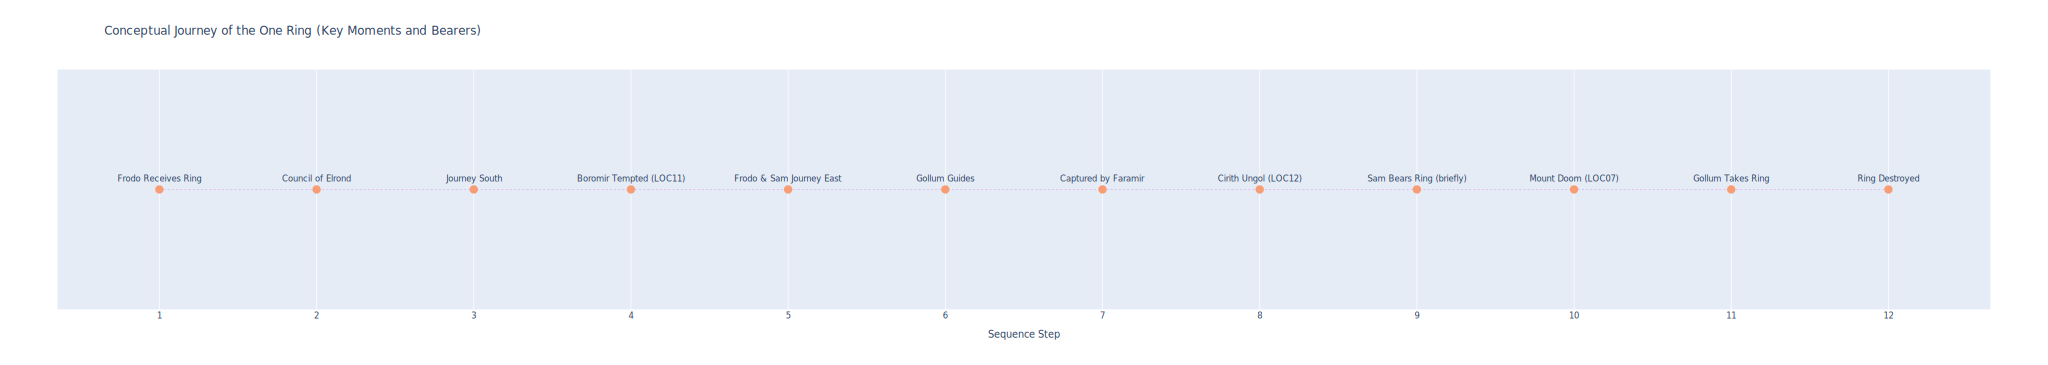

In [24]:
show_fig_or_image(viz18())

### **PALANTIR** ladies and gentlemen :)


Generating Viz 15: Palantír User Network (Orthanc Stone)
Palantír_User_Network_(Orthanc_Stone_&_Sauron)


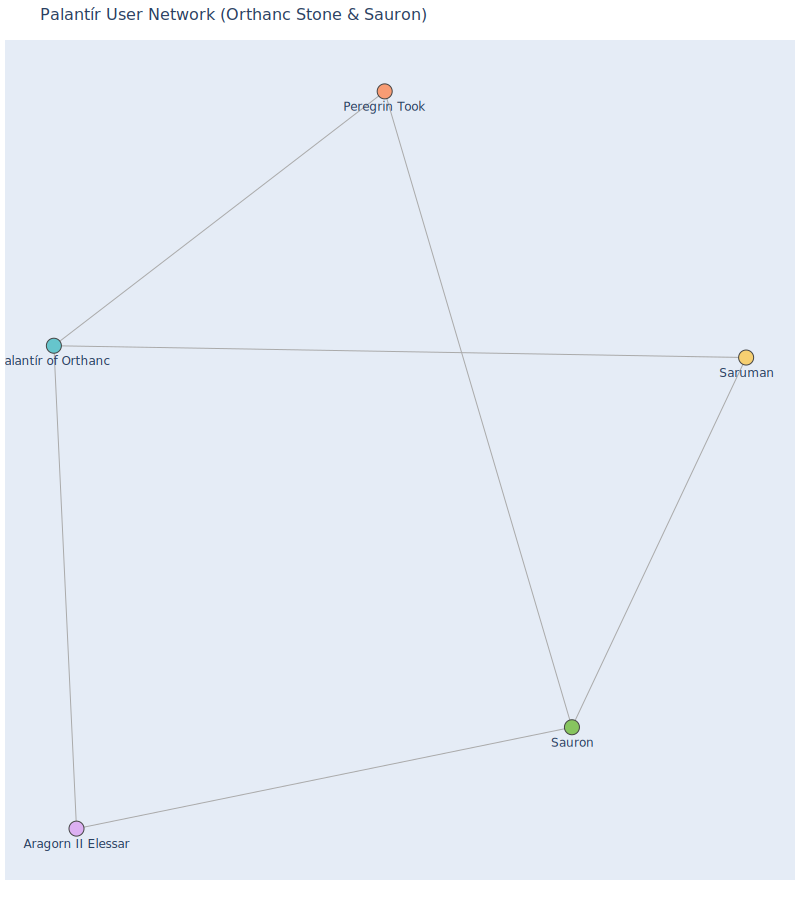

In [25]:
show_fig_or_image(viz19())

## Analysis 9: Race-Specific Contributions

*  To explore how different Races contributed to key events or exhibited characteristic skills based on the available character data.
    * **Representative Skills by Race:** Compares the average estimated skill levels (e.g., Archery, Melee, Stealth, Magic, Craft) across the major races represented by key characters, highlighting stereotypical strengths. (Requires skill data/assumptions).
    * **Race Participation Count in Key Event Types:** Shows a matrix of Races versus major event types (Fellowship, Battle Command), with cell intensity indicating the number of key characters of that race participating, revealing which races were prominent in different activities.


Generating Viz 16: Representative Skills by Race (Radar Chart)
Representative_Skills_by_Race_(Averages)


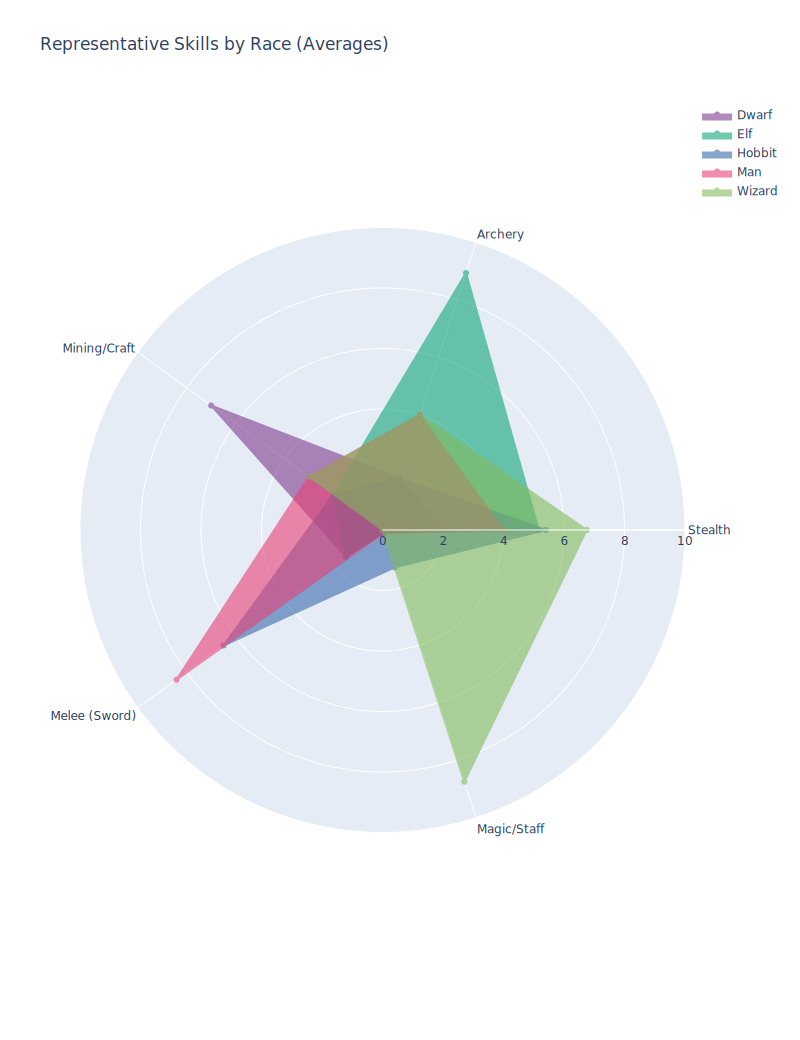

In [26]:
show_fig_or_image(viz20())


Generating Viz 17: Race Participation in Event Types (Heatmap)
Race_Participation_Count_in_Key_Event_Types


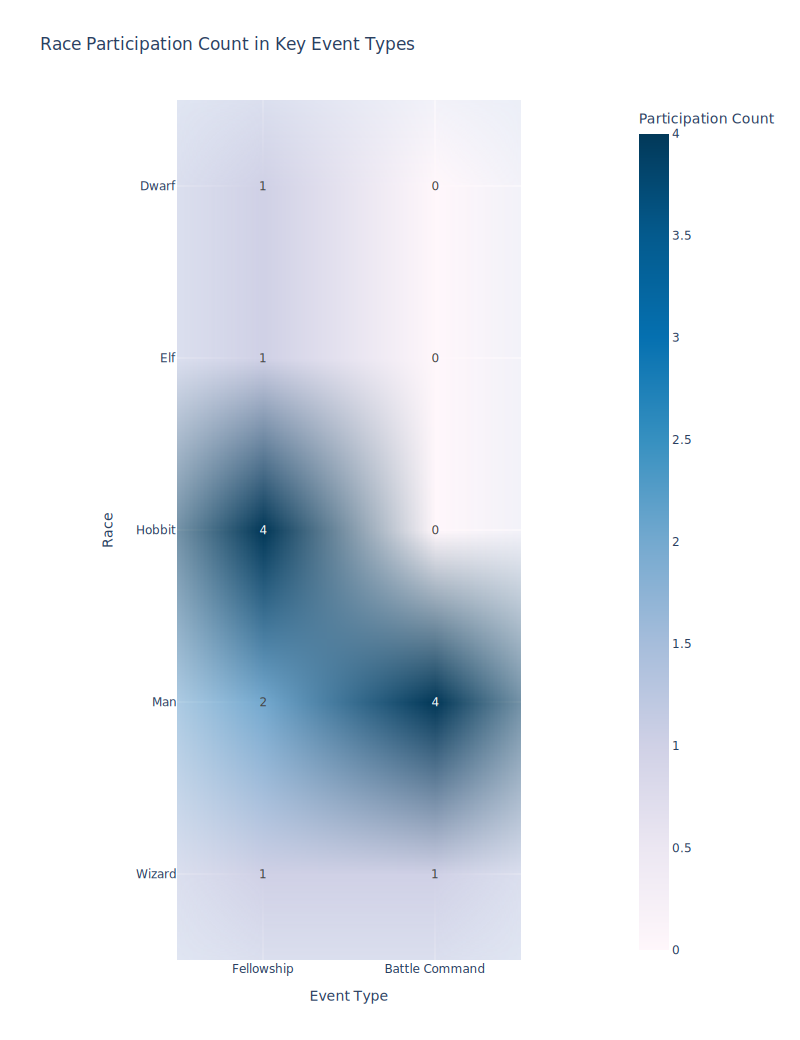

In [27]:
show_fig_or_image(viz21())

## Analysis 10: Kingdom Military Overview

*  To compare the primary allied Kingdoms (Gondor, Rohan) and their opponents based on associated armies, commanders, and size.
    * **Major Army Sizes:** Compares the estimated `totalUnits` for the major armies involved in the War of the Ring (Gondor, Rohan, Mordor, Isengard, Army of the Dead).
    * **Kingdom-Army-Commander Hierarchy:** Visualizes the structure of armies within their respective factions/kingdoms, potentially showing commanders. Box sizes are proportional to estimated army size (`totalUnits`).


Generating Viz 18: Comparison of Major Army Sizes
Estimated_Sizes_of_Major_Armies


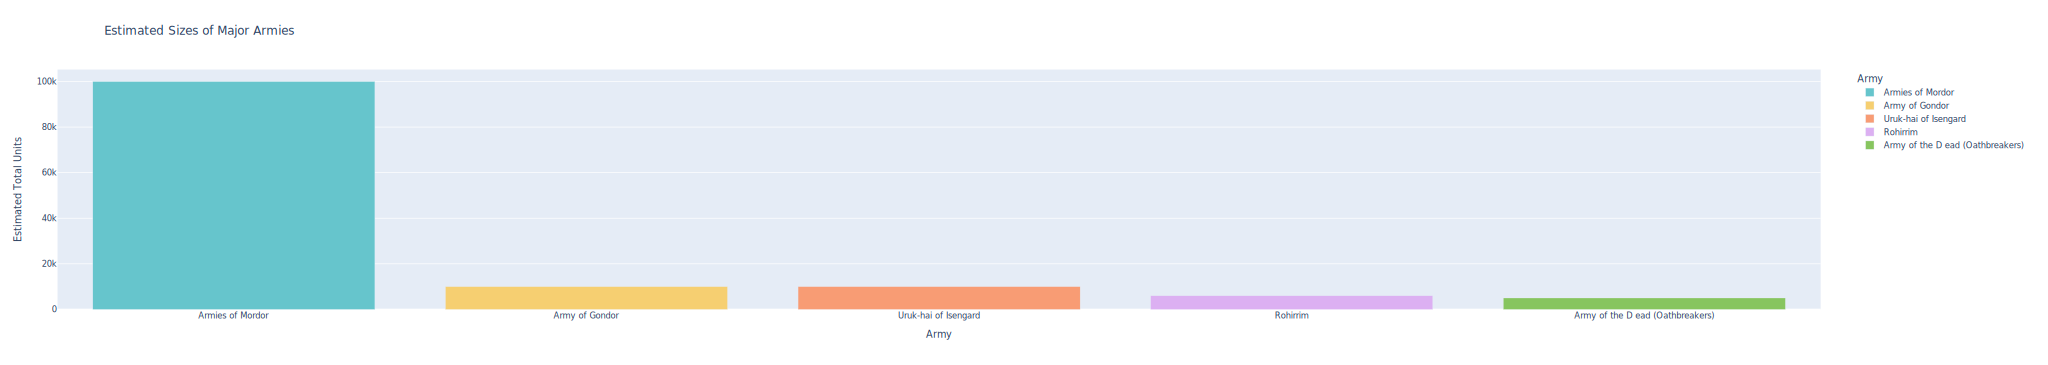

In [28]:
show_fig_or_image(viz22())


Generating Viz 19: Kingdom-Army-Commander Hierarchy (Treemap)
Hierarchy_of_Kingdoms,_Armies,_and_Commanders_(Sized_by_Army_Units)


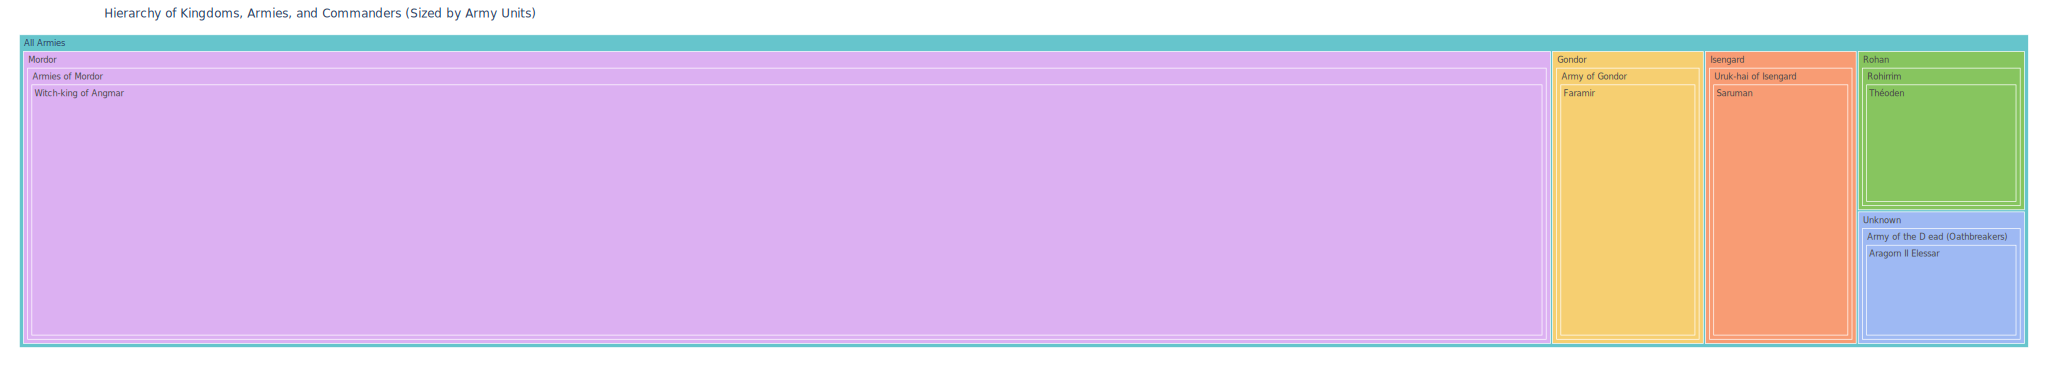

In [29]:
show_fig_or_image(viz23())

# “All’s well that ends better.”     
##                 — Hamfast *"Gaffer"* Gamgee  